In [8]:
%matplotlib inline
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch import optim
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation
import math , random

In [9]:
TIME_STEP = 10
INPUT_SIZE = 1
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
H_SIZE = 64
EPOCHS = 300
h_state = None

In [10]:
steps = np.linspace(0, np.pi*2, 256, dtype = np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)

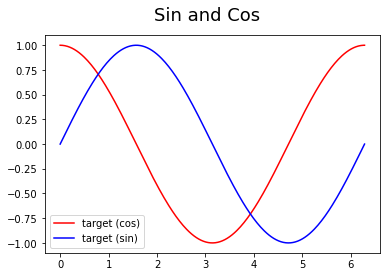

In [11]:
plt.figure(1)
plt.suptitle('Sin and Cos', fontsize = '18')
plt.plot(steps, y_np, 'r-', label = 'target (cos)')
plt.plot(steps, x_np, 'b-', label = 'target (sin)')
plt.legend(loc = 'best')
plt.show()

In [25]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size = INPUT_SIZE, hidden_size = H_SIZE, num_layers = 1, batch_first = True,)
        self.out = nn.Linear(H_SZIE, 1)
    
    def forward(self,x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step, :]))
        return torch.stack(outs, dim = 1), h_state

In [26]:
rnn = RNN().to(DEVICE)
optimizer = torch.optim.Adam(rnn.parameters())
criterion = nn.MSELoss()

EPOCHS: 19, Loss:0.052601


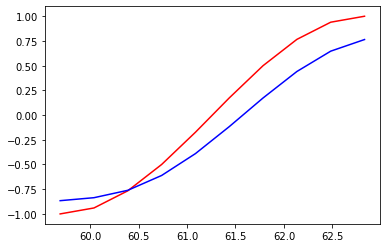

EPOCHS: 39, Loss:0.011210


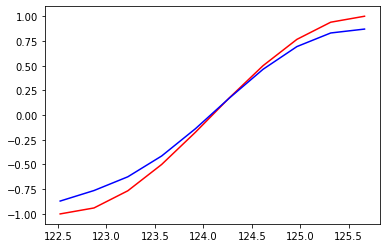

EPOCHS: 59, Loss:0.006581


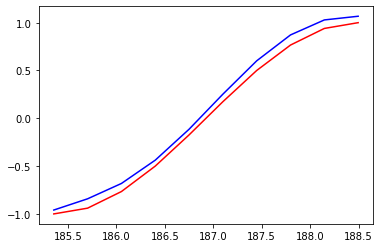

EPOCHS: 79, Loss:0.000835


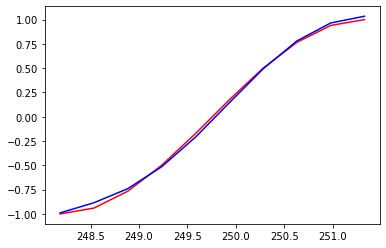

EPOCHS: 99, Loss:0.004181


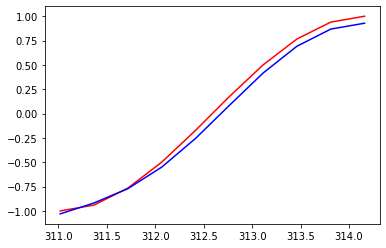

EPOCHS: 119, Loss:0.008276


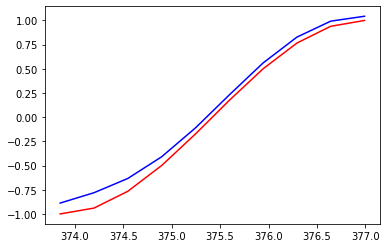

EPOCHS: 139, Loss:0.008227


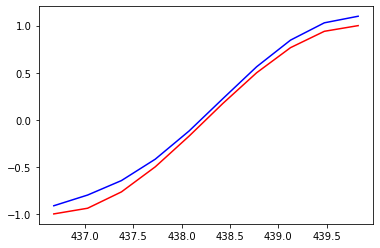

EPOCHS: 159, Loss:0.007020


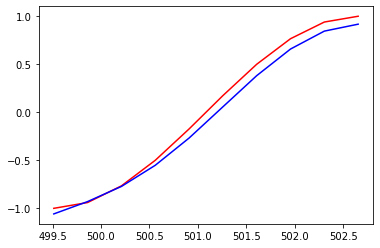

EPOCHS: 179, Loss:0.008619


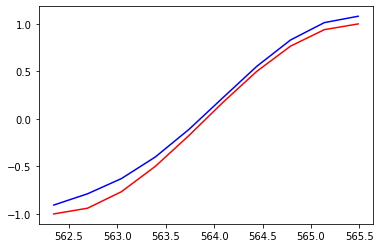

EPOCHS: 199, Loss:0.002221


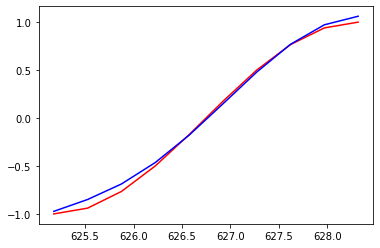

EPOCHS: 219, Loss:0.003594


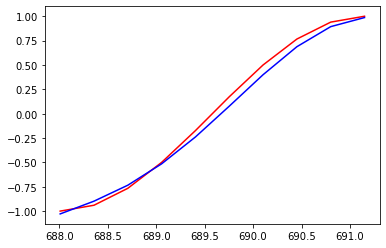

EPOCHS: 239, Loss:0.004474


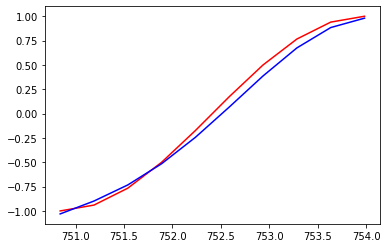

EPOCHS: 259, Loss:0.002270


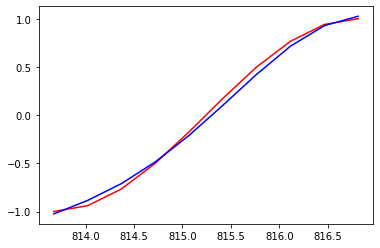

EPOCHS: 279, Loss:0.023911


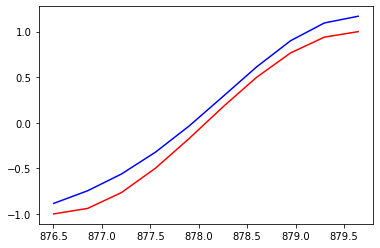

EPOCHS: 299, Loss:0.009299


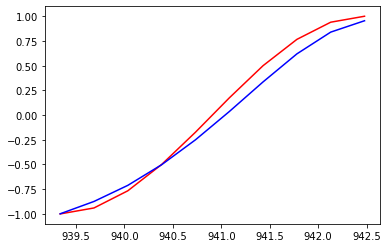

In [27]:
rnn.train()
plt.figure(2)
for step in range(EPOCHS):
    start, end = step * np.pi, (step +1) * np.pi
    steps = np.linspace(start, end, TIME_STEP, dtype = np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    x = x.to(DEVICE)
    prediction, h_state = rnn(x, h_state)
    h_state = h_state.data
    loss = criterion(prediction.cpu(),y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (step +1)%20 ==0:
        print("EPOCHS: {}, Loss:{:4f}".format(step,loss))
        plt.plot(steps,y_np.flatten(), 'r-')
        plt.plot(steps, prediction.cpu().data.numpy().flatten(),'b-')
        plt.draw()
        plt.pause(0.01)